In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

TEXT_DATA = pd.read_csv("/data/ganjar.csv")
TEXT_DATA.head()

,created_at,username,text
0,Thu Oct 19 22:07:12 +0000 2023,Tohid_siswanto,@OposisiOjol @AdeSudr90969850 @ganjarpranowo @...
1,Thu Oct 19 09:19:41 +0000 2023,hari1234t678910,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Mau ...
2,Thu Oct 19 08:47:27 +0000 2023,obor2150,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Hala...
3,Thu Oct 19 06:04:52 +0000 2023,JokoGadhang,@GunRomli @mohmahfudmd @ganjarpranowo Ini isti...
4,Thu Oct 19 00:18:09 +0000 2023,mustafaagus007,@HusinShihab @mohmahfudmd @ganjarpranowo Nguru...


In [ ]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
TEXT_DATA['prepros_text'] = TEXT_DATA['text'].str.lower()


print('Case Folding Result : \n')
print(TEXT_DATA['prepros_text'].head(5))
print('\n\n\n')

Case Folding Result : 

0    @oposisiojol @adesudr90969850 @ganjarpranowo @...
1    @ch_chotimah2 @ganjarpranowo @mohmahfudmd mau ...
2    @ch_chotimah2 @ganjarpranowo @mohmahfudmd hala...
3    @gunromli @mohmahfudmd @ganjarpranowo ini isti...
4    @husinshihab @mohmahfudmd @ganjarpranowo nguru...
Name: prepros_text, dtype: object






In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#pra pemrosesan data
def remove_text_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_text_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_number)

#remove punctuation [tanda baca]
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_singl_char)

# ------ Tokenizing ---------

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TEXT_DATA['text_tokens'] = TEXT_DATA['prepros_text'].apply(word_tokenize_wrapper)

print('Removal Punctuation : \n')
print(TEXT_DATA['prepros_text'].head())
print('\n')

print('Tokenizing Result : \n')
print(TEXT_DATA['text_tokens'].head())
print('\n\n\n')

Removal Punctuation : 

0    calon presiden rakyat ya yg anter rakyat bukan...
1    chotimah mau maju dari manasdh jabat th aja ka...
2    chotimah halah siapa yg masih percaya sama pdi...
3    ini istilahnya introspeksi diri bukan blunder ...
4    ngurus duit  aja kagak becus cuma gede bacot d...
Name: prepros_text, dtype: object


Tokenizing Result : 

0    [calon, presiden, rakyat, ya, yg, anter, rakya...
1    [chotimah, mau, maju, dari, manasdh, jabat, th...
2    [chotimah, halah, siapa, yg, masih, percaya, s...
3    [ini, istilahnya, introspeksi, diri, bukan, bl...
4    [ngurus, duit, aja, kagak, becus, cuma, gede, ...
Name: text_tokens, dtype: object






In [ ]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

TEXT_DATA['text_tokens_fdist'] = TEXT_DATA['text_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(TEXT_DATA['text_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(rakyat, 2), (yg, 2), (ga, 2), (calon, 1), (p...
1    [(chotimah, 1), (mau, 1), (maju, 1), (dari, 1)...
2    [(ampun, 2), (chotimah, 1), (halah, 1), (siapa...
3    [(diri, 2), (ini, 1), (istilahnya, 1), (intros...
4    [(ngurus, 1), (duit, 1), (aja, 1), (kagak, 1),...
Name: text_tokens_fdist, dtype: object


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project Ujaran Kebencian/stopwordsID.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TEXT_DATA['text_tokens_WSW'] = TEXT_DATA['text_tokens'].apply(stopwords_removal)


print(TEXT_DATA['text_tokens_WSW'].head())

0    [calon, presiden, rakyat, anter, rakyat, wan, ...
1    [chotimah, maju, manasdh, jabat, th, kagak, be...
2    [chotimah, halah, percaya, pdi, kecuali, orang...
3    [istilahnya, introspeksi, blunder, mengkritik,...
4    [ngurus, duit, kagak, becus, gede, bacot, dpn,...
Name: text_tokens_WSW, dtype: object


In [ ]:
!pip install xlrd
!pip install openpyxl

In [ ]:
normalizad_word = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Project Ujaran Kebencian/normalisasi.xlsx", engine='openpyxl')

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

TEXT_DATA['text_normalized'] = TEXT_DATA['text_tokens_WSW'].apply(normalized_term)

TEXT_DATA['text_normalized'].head(10)

0    [calon, presiden, rakyat, antar, rakyat, wan, ...
1    [chotimah, maju, manasdh, jabat, tahun, tidak,...
2    [chotimah, halah, percaya, pdi, kecuali, orang...
3    [istilahnya, introspeksi, blunder, mengkritik,...
4    [mengurus, uang, tidak, becus, besar, banyakbi...
5    [raharjo, tuhan, ganjar, satunya, capres, anti...
6    [raharjo, partai, banteng, satunya, partai, te...
7    [chotimah, otak, kamu, rejim, priode, ugalugal...
8    [menkopolhukam, becus, politik, hukum, amburad...
9    [kecewa, kayaknya, dibawa, mati, jokowi, memec...
Name: text_normalized, dtype: object

In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=d3085cdc019be36613b58dd343fc72f2c6693af8d0607d3676634ef6594fac3b
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
!pip install pandas numpy matplotlib Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TEXT_DATA['text_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TEXT_DATA['text_tokens_stemmed'] = TEXT_DATA['text_normalized'].swifter.apply(get_stemmed_term)
print(TEXT_DATA['text_tokens_stemmed'])

Streaming output truncated to the last 5000 lines.
dirumah : rumah
dwi : dwi
tunggal : tunggal
regulator : regulator
poro : poro
salahnya : salah
dijerat : jerat
it : it
mfud : mfud
gamasubo : gamasubo
kabare : kabare
penikmat : nikmat
nontonbareng : nontonbareng
kimochi : kimochi
pilm : pilm
ulama : ulama
haram : haram
lohloh : lohloh
broh : broh
menyusust : menyusust
kecanduan : candu
plototin : plototin
bini : bini
konon : konon
bahagia : bahagia
tremor : tremor
terkontrol : kontrol
didepan : depan
hikshuks : hikshuks
minuman : minum
kerassuka : kerassuka
aduuhh : aduuhh
hancurr : hancurr
malunyaa : malunyaa
podcastnya : podcastnya
klop : klop
bubarkan : bubar
maksiat : maksiat
podcast : podcast
kategori : kategori
darurat : darurat
pengujian : uji
dimaklumi : maklum
mengakui : aku
secara : cara
menyanggah : sanggah
diubah : ubah
nikmat : nikmat
kamau : kamau
topik : topik
basi : basi
sejenis : jenis
kubumu : kubu
kalai : kalai
terekspose : ekspose
akar : akar
rumput : rumput
pemili

Pandas Apply:   0%|          | 0/4001 [00:00<?, ?it/s]

0       [calon, presiden, rakyat, antar, rakyat, wan, ...
1       [chotimah, maju, manasdh, jabat, tahun, tidak,...
2       [chotimah, halah, percaya, pdi, kecuali, orang...
3       [istilah, introspeksi, blunder, kritik, instit...
4       [urus, uang, tidak, becus, besar, banyakbicara...
                              ...                        
3996    [biarin, suka, pandang, dukung, percaya, ganja...
3997    [sg, sukses, ganjar, harap, nahdliyin, pimpin,...
3998         [muba, sukses, maju, ganjar, ganjar, ganjar]
3999                         [ganjar, sukses, jawa, maju]
4000    [muba, ganjar, bawa, ubah, maju, sukses, ganja...
Name: text_tokens_stemmed, Length: 4001, dtype: object


# Hasil Pre-Prosesing

In [ ]:
TEXT_DATA.to_csv("Text_Preprocessing.csv")

In [ ]:
print('\nNormalized Result : \n')
print(TEXT_DATA['text_normalized'].head(10))

print('\nStemming Result : \n')
print(TEXT_DATA['text_tokens_stemmed'].head(10))


Normalized Result : 

0    [calon, presiden, rakyat, antar, rakyat, wan, ...
1    [chotimah, maju, manasdh, jabat, tahun, tidak,...
2    [chotimah, halah, percaya, pdi, kecuali, orang...
3    [istilahnya, introspeksi, blunder, mengkritik,...
4    [mengurus, uang, tidak, becus, gede, banyakbic...
5    [raharjo, tuhan, ganjar, satunya, capres, anti...
6    [raharjo, partai, banteng, satunya, partai, te...
7    [chotimah, otak, kamu, rejim, priode, ugalugal...
8    [menkopolhukam, becus, politik, hukum, amburad...
9    [kecewa, kayaknya, dibawa, mati, jokowi, memec...
Name: text_normalized, dtype: object

Stemming Result : 

0    [calon, presiden, rakyat, antar, rakyat, wan, ...
1    [chotimah, maju, manasdh, jabat, tahun, tidak,...
2    [chotimah, halah, percaya, pdi, kecuali, orang...
3    [istilah, introspeksi, blunder, kritik, instit...
4    [urus, uang, tidak, becus, gede, banyakbicara,...
5    [raharjo, tuhan, ganjar, satu, capres, anti, m...
6    [raharjo, partai, banteng, satu, p

In [ ]:
print('Original Text : \n')
print(TEXT_DATA['text'].loc[1], '\n')
print(TEXT_DATA['text'].loc[2], '\n')
print(TEXT_DATA['text'].loc[3], '\n\n')

# ------ Case Folding --------
TEXT_DATA['case_folding'] = TEXT_DATA['text'].str.lower()
print('Case Folding : \n')
print(TEXT_DATA['case_folding'].loc[1], '\n')
print(TEXT_DATA['case_folding'].loc[2], '\n')
print(TEXT_DATA['case_folding'].loc[3], '\n\n')

# ------ Removal Punctuation ---------
print('Removal Punctuation : \n')
print(TEXT_DATA['prepros_text'].loc[1], '\n')
print(TEXT_DATA['prepros_text'].loc[2], '\n')
print(TEXT_DATA['prepros_text'].loc[3], '\n\n')

# ------ Tokenizing ---------
print('Tokenizing : \n')
print(TEXT_DATA['text_tokens'].loc[1], '\n')
print(TEXT_DATA['text_tokens'].loc[2], '\n')
print(TEXT_DATA['text_tokens'].loc[3], '\n\n')

# ------ Stopword ---------
print('Stopword : \n')
print(TEXT_DATA['text_tokens_WSW'].loc[1], '\n')
print(TEXT_DATA['text_tokens_WSW'].loc[2], '\n')
print(TEXT_DATA['text_tokens_WSW'].loc[3], '\n\n')

# ------ Normalization ---------
print('Normalization : \n')
print(TEXT_DATA['text_normalized'].loc[1], '\n')
print(TEXT_DATA['text_normalized'].loc[2], '\n')
print(TEXT_DATA['text_normalized'].loc[3], '\n\n')

# ------ Stemming ---------
print('Stemming : \n')
print(TEXT_DATA['text_tokens_stemmed'].loc[1], '\n')
print(TEXT_DATA['text_tokens_stemmed'].loc[2], '\n')
print(TEXT_DATA['text_tokens_stemmed'].loc[3], '\n\n')

Original Text : 

@ch_chotimah2 @ganjarpranowo @mohmahfudmd Mau maju dari mana....sdh jabat 5 th aja kagak becus nangkep seokor koruptor.ðŸ˜´ https://t.co/xlBLoFwcFn 

@ch_chotimah2 @ganjarpranowo @mohmahfudmd Halah siapa yg masih percaya sama pdi kecuali orang patah hati ,,korupsi juara,,nangkep harun masiku ga becus..pak mpud semangat uang ratusan trilyun sekarang lupa to ampun ampun jangan sampai dagelan di negri ini ada lagi 

@GunRomli @mohmahfudmd @ganjarpranowo Ini istilahnya introspeksi diri -bukan blunder-, dengan mengkritik diri atau institusinya sendiri.  Pak @jokowi emang kurang becus memilih tim mengatasi hukum dlm kabinetnya. 


Case Folding : 

@ch_chotimah2 @ganjarpranowo @mohmahfudmd mau maju dari mana....sdh jabat 5 th aja kagak becus nangkep seokor koruptor.ðÿ˜´ https://t.co/xlblofwcfn 

@ch_chotimah2 @ganjarpranowo @mohmahfudmd halah siapa yg masih percaya sama pdi kecuali orang patah hati ,,korupsi juara,,nangkep harun masiku ga becus..pak mpud semangat uang ratusa

## Proses TFIDF

In [ ]:
# load dataset
raw_data = pd.read_csv("/content/Text_Preprocessing.csv", usecols=["created_at", "username", "text", "prepros_text", "text_tokens_stemmed"])
raw_data.columns = ["created_at", "username", "text", "prepros_text", "text_tokens_stemmed"]
raw_data.head()

,created_at,username,text,prepros_text,text_tokens_stemmed
0,Thu Oct 19 22:07:12 +0000 2023,Tohid_siswanto,@OposisiOjol @AdeSudr90969850 @ganjarpranowo @...,calon presiden rakyat ya yg anter rakyat bukan...,"['calon', 'presiden', 'rakyat', 'anter', 'raky..."
1,Thu Oct 19 09:19:41 +0000 2023,hari1234t678910,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Mau ...,chotimah mau maju dari manasdh jabat th aja ka...,"['chotimah', 'maju', 'manasdh', 'jabat', 'th',..."
2,Thu Oct 19 08:47:27 +0000 2023,obor2150,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Hala...,chotimah halah siapa yg masih percaya sama pdi...,"['chotimah', 'halah', 'percaya', 'pdi', 'kecua..."
3,Thu Oct 19 06:04:52 +0000 2023,JokoGadhang,@GunRomli @mohmahfudmd @ganjarpranowo Ini isti...,ini istilahnya introspeksi diri bukan blunder ...,"['istilah', 'introspeksi', 'blunder', 'kritik'..."
4,Thu Oct 19 00:18:09 +0000 2023,mustafaagus007,@HusinShihab @mohmahfudmd @ganjarpranowo Nguru...,ngurus duit aja kagak becus cuma gede bacot d...,"['ngurus', 'duit', 'kagak', 'becus', 'gede', '..."


In [ ]:
# convert list formated string to list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

raw_data["text_list"] = raw_data["text_tokens_stemmed"].apply(convert_text_list)


#print(raw_data["text_list"][90])

#print("\ntype : ", type(raw_data["text_list"][90]))

In [ ]:
##Term Frequency (TF)


def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

raw_data["TF_dict"] = raw_data['text_list'].apply(calc_TF)

raw_data["TF_dict"].head()

0    {'calon': 0.047619047619047616, 'presiden': 0....
1    {'chotimah': 0.1, 'maju': 0.1, 'manasdh': 0.1,...
2    {'chotimah': 0.041666666666666664, 'halah': 0....
3    {'istilah': 0.07692307692307693, 'introspeksi'...
4    {'ngurus': 0.1111111111111111, 'duit': 0.11111...
Name: TF_dict, dtype: object

In [ ]:
# Check TF result
index = 90

print('%20s' % "term", "\t", "TF\n")
for key in raw_data["TF_dict"][index]:
    print('%20s' % key, "\t", raw_data["TF_dict"][index][key])

                term 	 TF

             ngomong 	 0.125
               ngaca 	 0.125
            prestasi 	 0.125
             junjung 	 0.125
                udah 	 0.125
               becus 	 0.125
                 blm 	 0.125
             nerocos 	 0.125


In [ ]:
##Inverse Document Frequency (IDF)

def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(raw_data["TF_dict"])

In [ ]:
n_document = len(raw_data)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
raw_data["TF-IDF_dict"] = raw_data["TF_dict"].apply(calc_TF_IDF)

In [ ]:
raw_data["TF-IDF_dict"]

0       {'calon': 0.1900111674120507, 'presiden': 0.13...
1       {'chotimah': 0.3630860514745168, 'maju': 0.216...
2       {'chotimah': 0.15128585478104864, 'halah': 0.2...
3       {'istilah': 0.5847040329459453, 'introspeksi':...
4       {'ngurus': 0.4704285109234239, 'duit': 0.56847...
                              ...                        
3996    {'biarin': 0.4605336831824896, 'suka': 0.17225...
3997    {'sg': 0.4729300127925481, 'sukses': 0.2300843...
3998    {'muba': 0.883094555883874, 'sukses': 0.306779...
3999    {'ganjar': 0.06949542758845503, 'sukses': 0.46...
4000    {'muba': 0.6623209169129055, 'ganjar': 0.10424...
Name: TF-IDF_dict, Length: 4001, dtype: object

In [ ]:
# Check TF-IDF result
index = 90

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in raw_data["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", raw_data["TF_dict"][index][key] ,"\t" , raw_data["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

             ngomong 	 0.125 	 0.6395307223136611
               ngaca 	 0.125 	 0.8356077120528919
            prestasi 	 0.125 	 0.5358708029530955
             junjung 	 0.125 	 0.6623209169129055
                udah 	 0.125 	 0.4921988477709554
               becus 	 0.125 	 0.3233986680135449
                 blm 	 0.125 	 0.6826357831001273
             nerocos 	 0.125 	 0.9501440535371611


In [ ]:
# sort descending by value for DF dictionary
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

raw_data["TF_IDF_Vec"] = raw_data["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(raw_data["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(raw_data["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12319949257658852, 0.0, 0.0, 0.0, 0.0, 0.1307249297124769, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2858090270602612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


In [ ]:
# Convert Series to List
TF_IDF_Vec_List = np.array(raw_data["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
5,sukses,218.523970
1,mahfud,210.522173
4,menang,175.412282
3,dukung,167.531337
2,indonesia,147.070478
8,maju,142.996930
6,unggul,119.897858
0,ganjar,111.894051
7,pranowo,88.956485
12,bobrok,85.938667


In [ ]:
TF_IDF_Vec_List

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.13899086, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06949543, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10424314, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
raw_data["text_join"] = raw_data["text_tokens_stemmed"].apply(join_text_list)

raw_data["text_join"].head()

0    calon presiden rakyat anter rakyat wan toamasa...
1    chotimah maju manasdh jabat th kagak becus nan...
2    chotimah halah percaya pdi kecuali orang patah...
3    istilah introspeksi blunder kritik institusi e...
4    ngurus duit kagak becus gede bacot dpn anggota...
Name: text_join, dtype: object

In [ ]:
# banyaknya term yang akan digunakan,
# di pilih berdasarkan top max_features
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 1000

# Feature Engineering
print ("------- TF-IDF on Tweet data -------")

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(raw_data["text_join"]).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

------- TF-IDF on Tweet data -------
TF-IDF  <class 'numpy.ndarray'> (4001, 1000)


In [ ]:
terms = tf_idf.get_feature_names_out()

# sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
267,ganjar,370.130222
529,mahfud,298.260746
854,sukses,243.500727
567,menang,208.716914
229,dukung,203.863686
...,...,...
373,jahat,2.069573
62,baekhyun,2.038883
768,ruben,2.016049
773,sah,1.999673


## Menghitung TF Scikit-Learn dengan CountVectorizer() / L1 Norm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

# calc TF vector
cvect = CountVectorizer(max_features=max_features)
TF_vector = cvect.fit_transform(raw_data["text_join"])

# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# calc IDF
tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
tfs = tfidf.fit_transform(raw_data["text_join"])
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()

## Contoh perhitungan TF-IDF L1 Normalization Unigram, Bigram, Trigram

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

# ngram_range (1, 3) to use unigram, bigram, trigram
cvect = CountVectorizer(max_features=max_features, ngram_range=(1,3))
counts = cvect.fit_transform(raw_data["text_join"])

normalized_counts = normalize(counts, norm='l1', axis=1)

tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1,3), smooth_idf=False)
tfs = tfidf.fit_transform(raw_data["text_join"])

tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

In [ ]:
tfidf_mat

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.22057655, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11764083, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tfidf.get_feature_names_out()

array(['acara', 'adil', 'adil lanjut', 'adil lestari',
       'adil lestari program', 'agama', 'ahok', 'akal', 'akibat', 'aku',
       'alam', 'alas', 'alias', 'allah', 'alphard', 'aman', 'ambil',
       'amin', 'anak', 'anak muda', 'anakkolong', 'andika', 'anggap',
       'anies', 'anies baswedan', 'anis', 'anti', 'apa', 'asli', 'awal',
       'ayo', 'baca', 'bacapres', 'back', 'bacot', 'bagi', 'bagus',
       'bahas', 'bahrawi', 'baik', 'baik dunia', 'baik dunia partei',
       'baik ganjar', 'baju', 'banding', 'bang', 'banget', 'bangga',
       'bangsa', 'bangun', 'banjir', 'banteng', 'banteng satu',
       'banteng satu partei', 'banyak', 'bareng', 'baris', 'baris dukung',
       'baswedan', 'baswedan ganjar', 'baswedan tegas',
       'baswedan tegas ganjar', 'batal', 'bawa', 'bawa indonesia',
       'bawa indonesia unggul', 'bawa ubah', 'bayar', 'bebas', 'becus',
       'becus kader', 'becus kader kader', 'becus kerja', 'becus urus',
       'beda', 'bedah', 'bedah visi', 'bedah vi

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000


def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram))
    counts = cvect.fit_transform(raw_data["text_join"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram), smooth_idf=False)
    tfs = tfidf.fit_transform(raw_data["text_join"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()

# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

# ngram_range (2, 2) to use bigram only
tf_mat_bigram, idf_mat_bigram, tfidf_mat_bigram, terms_bigram = generate_tfidf_mat(2,2)

# ngram_range (3, 3) to use trigram only
tf_mat_trigram, idf_mat_trigram, tfidf_mat_trigram, terms_trigram = generate_tfidf_mat(3,3)

# ---------- check sparse data -------------------
idx_sample = 0

print("Show TFIDF sample ke-" + str(idx_sample), "\n")
print(raw_data["text_tokens_stemmed"][idx_sample], "\n")

print("\t\t\t", "TF", "\t\t", "IDF", "\t\t", "TF-IDF", "\t", "Term\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ("array position " + str(i) + "\t",
               "%.6f" % item[0], "\t",
               "%.6f" % item[1], "\t",
               "%.6f" % item[2], "\t",
               item[3])

Show TFIDF sample ke-0 

['calon', 'presiden', 'rakyat', 'anter', 'rakyat', 'wan', 'toamasa', 'hadir', 'kader', 'partai', 'hulu', 'balang', 'ngibulnya', 'ketulungan', 'ngurus', 'jakarta', 'becus', 'eh', 'pakai', 'selamatin', 'palestine'] 

			 TF 		 IDF 		 TF-IDF 	 Term

array position 90	 0.076923 	 3.590517 	 0.276194 	 becus
array position 153	 0.076923 	 5.003840 	 0.384911 	 calon
array position 235	 0.076923 	 6.655242 	 0.511942 	 eh
array position 316	 0.076923 	 6.403928 	 0.492610 	 hadir
array position 375	 0.076923 	 5.710781 	 0.439291 	 jakarta
array position 407	 0.076923 	 4.963566 	 0.381813 	 kader
array position 630	 0.076923 	 5.251248 	 0.403942 	 ngurus
array position 665	 0.076923 	 6.249777 	 0.480752 	 pakai
array position 675	 0.076923 	 4.794490 	 0.368807 	 partai
array position 728	 0.076923 	 3.749122 	 0.288394 	 presiden
array position 757	 0.153846 	 4.006033 	 0.616313 	 rakyat
array position 983	 0.076923 	 7.348389 	 0.565261 	 wan


In [ ]:
tfidf_mat_unigram

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### K-means Proses

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

In [ ]:
#vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(raw_data["text_join"])
#X = tfs
VX = vectorizer.fit_transform(raw_data["text_join"])

In [ ]:
tfs

<2722x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 35216 stored elements in Compressed Sparse Row format>

In [ ]:
#tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
#tfidf = tfidf_vectorizer.fit_transform(comment_join)
#tfidf = tfidf_mat_unigram
#tfidf = tfs
#tfidf = tfidf_mat_unigram

In [ ]:
#kmeans = KMeans(n_clusters=2).fit(tfidf)

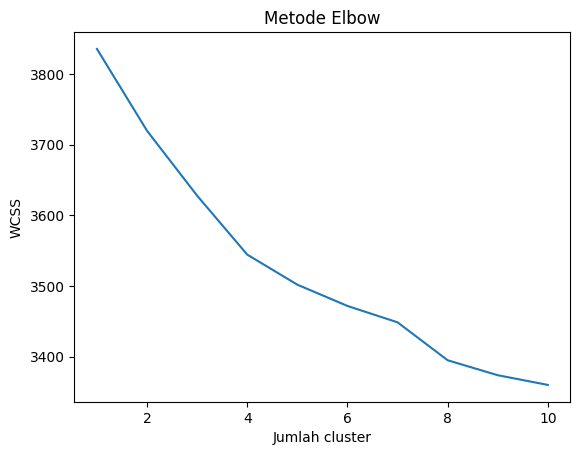

In [ ]:
# Membuat TF-IDF matrix
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(raw_data['comment_join'])

# Mencari nilai K yang optimal dengan metode elbow
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah cluster')
plt.ylabel('WCSS')
plt.show()

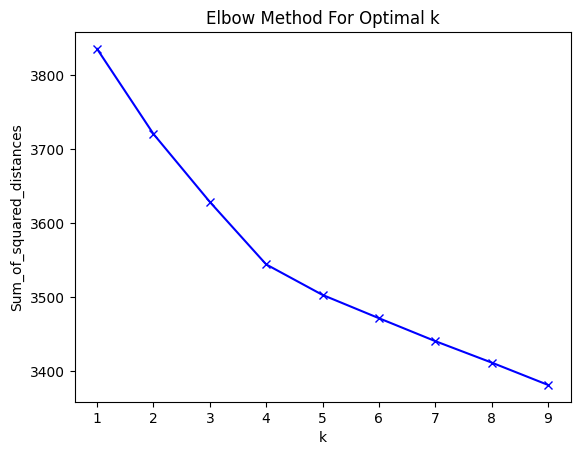

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
import seaborn as sns

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=6, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Menambahkan kolom cluster, x0, x1 pada data frame df

In [ ]:
# assign clusters and pca vectors to our dataframe
raw_data['cluster'] = clusters
raw_data['x0'] = x0
raw_data['x1'] = x1

In [ ]:
raw_data.head()

,created_at,username,text,prepros_text,text_tokens_stemmed,text_list,TF_dict,TF-IDF_dict,TF_IDF_Vec,text_join,cluster,x0,x1,cluster_numeric
0,Thu Oct 19 22:07:12 +0000 2023,Tohid_siswanto,@OposisiOjol @AdeSudr90969850 @ganjarpranowo @...,calon presiden rakyat ya yg anter rakyat bukan...,"['calon', 'presiden', 'rakyat', 'anter', 'raky...","[calon, presiden, rakyat, anter, rakyat, wan, ...","{'calon': 0.047619047619047616, 'presiden': 0....","{'calon': 0.1900111674120507, 'presiden': 0.13...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",calon presiden rakyat anter rakyat wan toamasa...,1,-0.146331,-0.018900,3
1,Thu Oct 19 09:19:41 +0000 2023,hari1234t678910,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Mau ...,chotimah mau maju dari manasdh jabat th aja ka...,"['chotimah', 'maju', 'manasdh', 'jabat', 'th',...","[chotimah, maju, manasdh, jabat, th, kagak, be...","{'chotimah': 0.1, 'maju': 0.1, 'manasdh': 0.1,...","{'chotimah': 0.3630860514745168, 'maju': 0.216...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.216...",chotimah maju manasdh jabat th kagak becus nan...,1,-0.078928,-0.098422,3
2,Thu Oct 19 08:47:27 +0000 2023,obor2150,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Hala...,chotimah halah siapa yg masih percaya sama pdi...,"['chotimah', 'halah', 'percaya', 'pdi', 'kecua...","[chotimah, halah, percaya, pdi, kecuali, orang...","{'chotimah': 0.041666666666666664, 'halah': 0....","{'chotimah': 0.15128585478104864, 'halah': 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",chotimah halah percaya pdi kecuali orang patah...,1,-0.122995,-0.008174,3
3,Thu Oct 19 06:04:52 +0000 2023,JokoGadhang,@GunRomli @mohmahfudmd @ganjarpranowo Ini isti...,ini istilahnya introspeksi diri bukan blunder ...,"['istilah', 'introspeksi', 'blunder', 'kritik'...","[istilah, introspeksi, blunder, kritik, instit...","{'istilah': 0.07692307692307693, 'introspeksi'...","{'istilah': 0.5847040329459453, 'introspeksi':...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",istilah introspeksi blunder kritik institusi e...,1,-0.136579,-0.012511,3
4,Thu Oct 19 00:18:09 +0000 2023,mustafaagus007,@HusinShihab @mohmahfudmd @ganjarpranowo Nguru...,ngurus duit aja kagak becus cuma gede bacot d...,"['ngurus', 'duit', 'kagak', 'becus', 'gede', '...","[ngurus, duit, kagak, becus, gede, bacot, dpn,...","{'ngurus': 0.1111111111111111, 'duit': 0.11111...","{'ngurus': 0.4704285109234239, 'duit': 0.56847...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ngurus duit kagak becus gede bacot dpn anggota...,1,-0.139379,-0.017986,3


In [ ]:
#Menampilkan 10 kata yang paling sering muncul pada masing-masing cluster
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    raw_data = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in raw_data.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Cluster 0
lestari,indonesia,gerak,unggul,visi,negara,wujud,adil,maritim,cepat

Cluster 1
nonton,jokowi,porno,dukung,gagal,bokep,becus,suka,bobrok,ganjar

Cluster 2
putar,pasang,pilpres,bismillah,semangat,raharjo,ganjar,dukung,mahfud,menang

Cluster 3
tegak,pranowo,lurus,libat,langgar,wadas,ham,ganjar,korupsi,ektp

Cluster 4
cepat,pasang,ganjarmahfud,hasil,pranowo,md,ganjar,mahfud,indonesia,unggul

Cluster 5
pranowo,pimpin,sehat,semangat,indonesia,moga,mahfud,ganjar,maju,sukses


In [ ]:
#Melihat Distribusi Sentimen
from collections import Counter

Counter(raw_data['cluster'])

Counter({1: 1808, 3: 416, 5: 555, 2: 637, 4: 381, 0: 204})

In [ ]:
from wordcloud import WordCloud

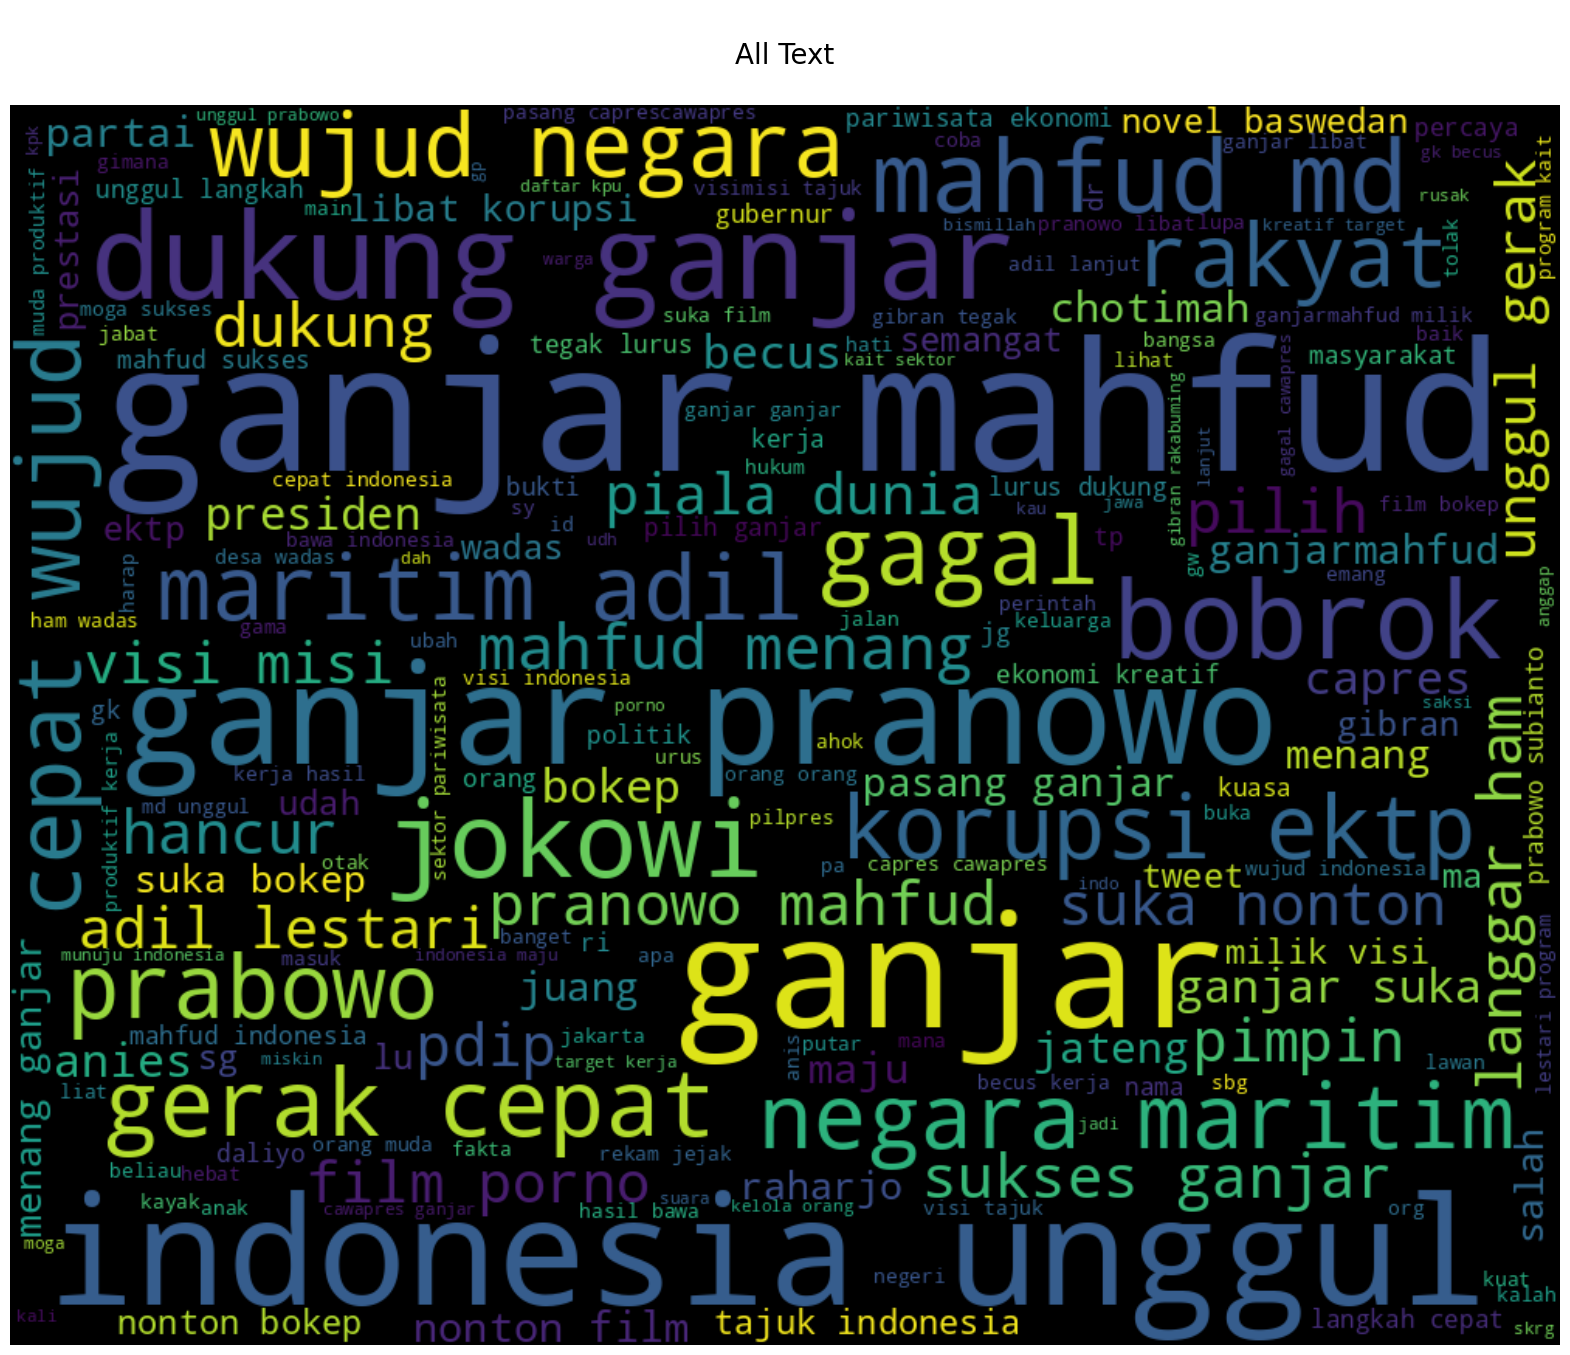

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
firstcloud_all = WordCloud(
    background_color='black',
    width=1000,
    height=800
).generate(" ".join(raw_data['text_join']))
ax.imshow(firstcloud_all, interpolation='bilinear')
ax.set_title('\nAll Text\n', fontsize=20)
ax.axis('off')
plt.show()

(-0.5, 999.5, 799.5, -0.5)

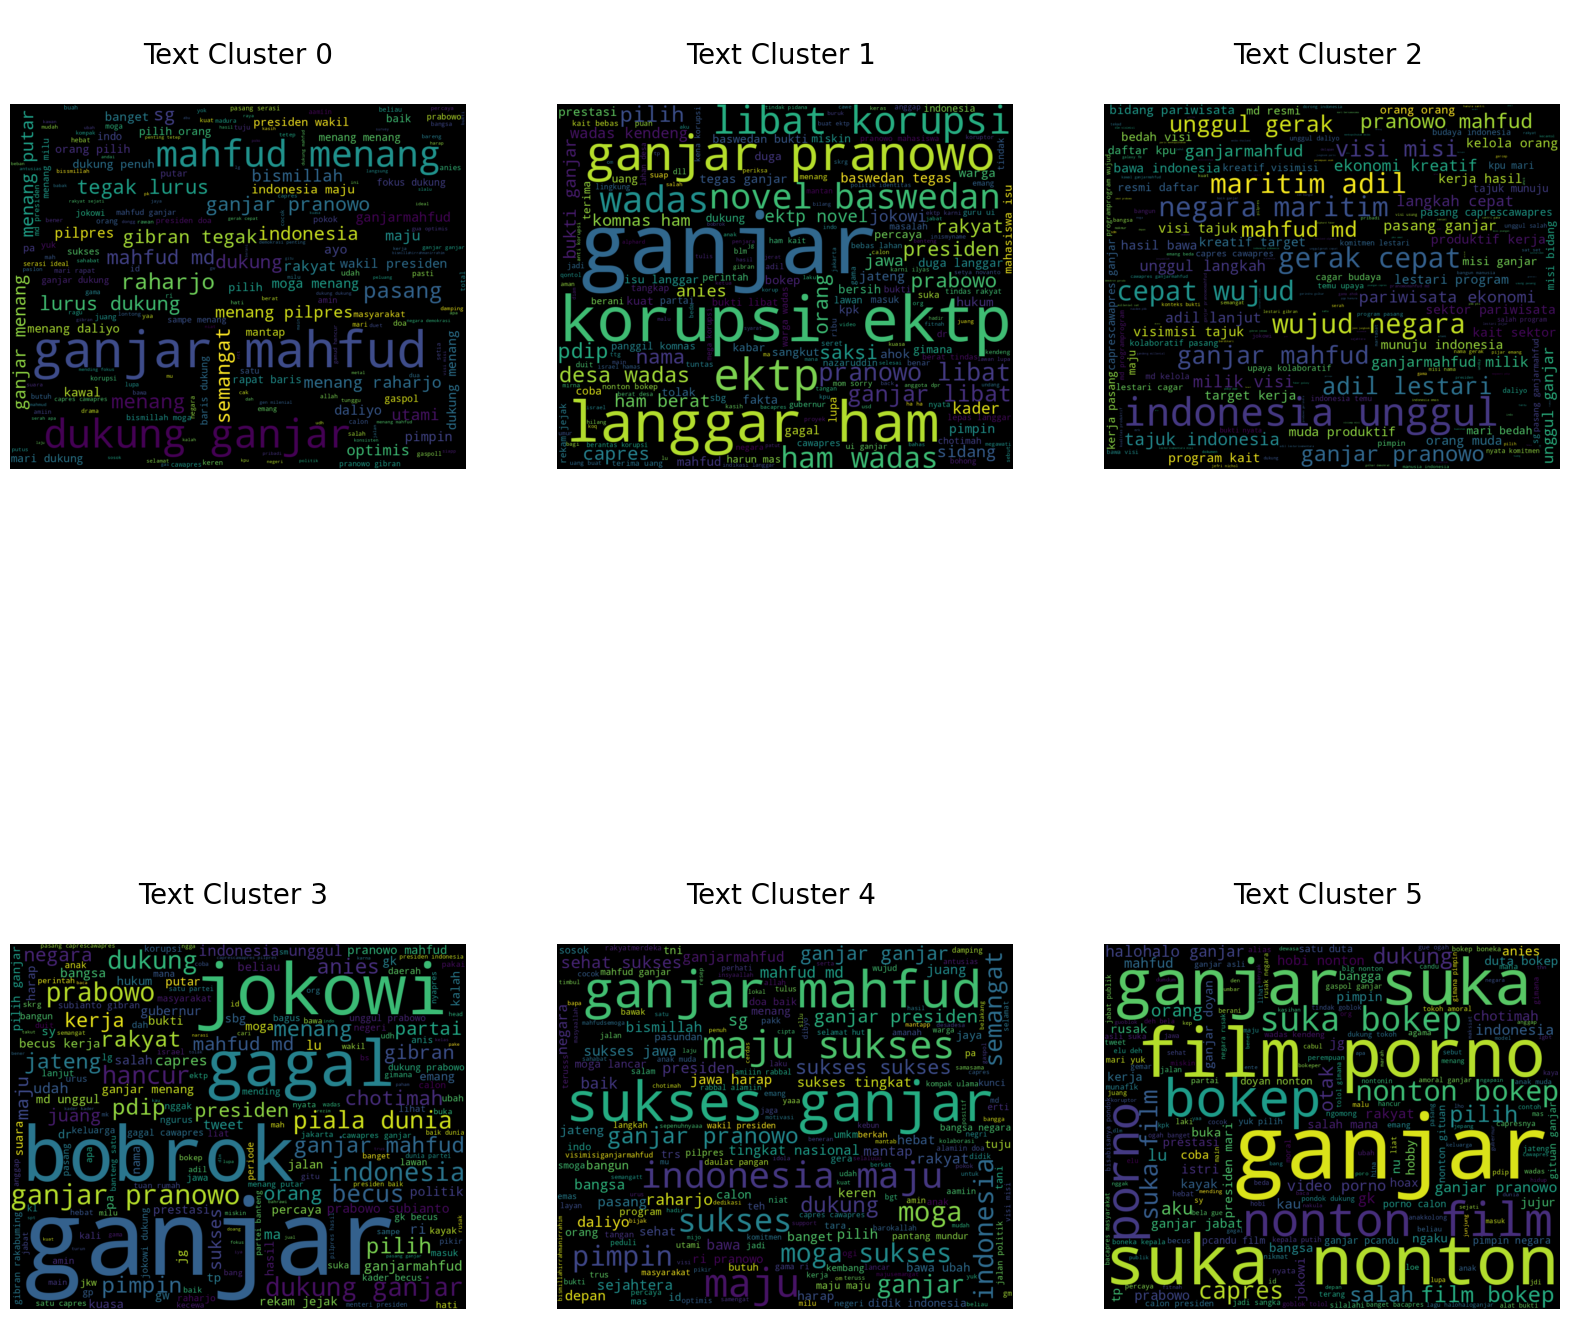

In [ ]:
fig, ax = plt.subplots(2, 3, figsize  = (20,20))
firstcloud_0=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==0]['text_join']))
firstcloud_1=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==1]['text_join']))
firstcloud_2=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==2]['text_join']))
firstcloud_3=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==3]['text_join']))
firstcloud_4=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==4]['text_join']))
firstcloud_5=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==5]['text_join']))

ax[0, 0].imshow(firstcloud_0, interpolation='bilinear')
ax[0, 0].set_title('\nText Cluster 0\n', fontsize=20)
ax[0, 0].axis('off')
print('\n')
ax[0, 1].imshow(firstcloud_1, interpolation='bilinear')
ax[0, 1].set_title('\nText Cluster 1 \n', fontsize=20)
ax[0, 1].axis('off')
print('\n')
ax[0, 2].imshow(firstcloud_2, interpolation='bilinear')
ax[0, 2].set_title('\nText Cluster 2 \n', fontsize=20)
ax[0, 2].axis('off')
print('\n')
ax[1, 0].imshow(firstcloud_3, interpolation='bilinear')
ax[1, 0].set_title('\nText Cluster 3 \n', fontsize=20)
ax[1, 0].axis('off')
print('\n')
ax[1, 1].imshow(firstcloud_4, interpolation='bilinear')
ax[1, 1].set_title('\nText Cluster 4 \n', fontsize=20)
ax[1, 1].axis('off')
print('\n')
ax[1, 2].imshow(firstcloud_5, interpolation='bilinear')
ax[1, 2].set_title('\nText Cluster 5 \n', fontsize=20)
ax[1, 2].axis('off')

In [ ]:
# map clusters to appropriate labels
cluster_map = {0: "Cluster 0", 1: "Cluster 1", 2: "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5"}
# apply mapping
raw_data['cluster'] = raw_data['cluster'].map(cluster_map)

In [ ]:
raw_data['cluster']

0       Cluster 1
1       Cluster 1
2       Cluster 1
3       Cluster 1
4       Cluster 1
          ...    
3996    Cluster 1
3997    Cluster 5
3998    Cluster 5
3999    Cluster 5
4000    Cluster 5
Name: cluster, Length: 4001, dtype: object

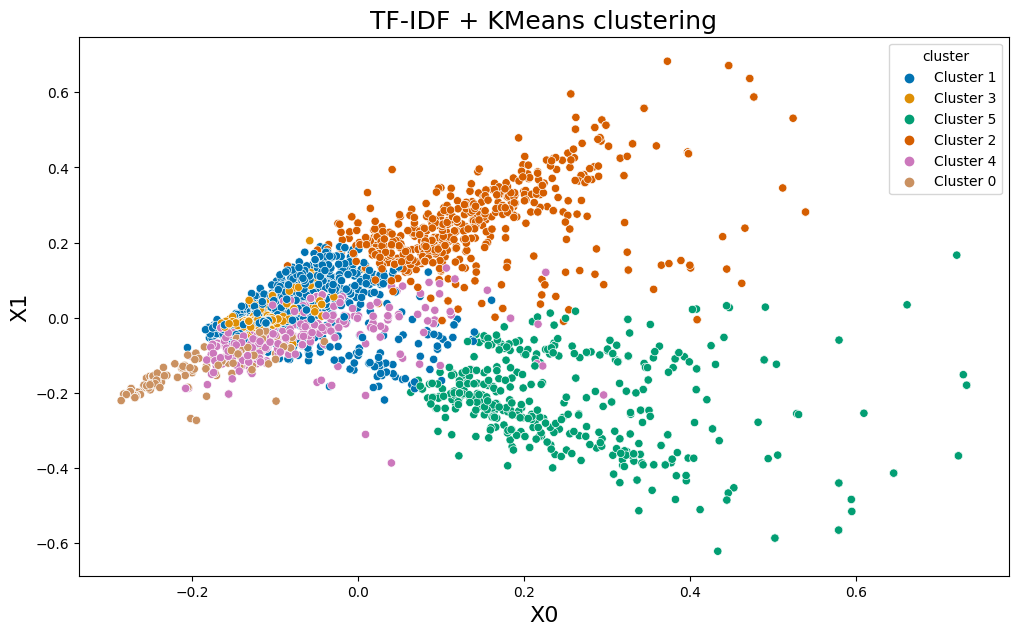

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=raw_data, x='x0', y='x1', hue='cluster', palette="colorblind")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

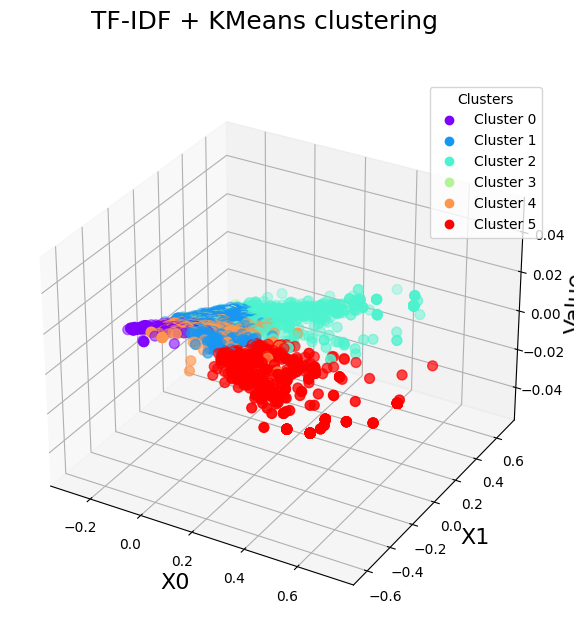

In [ ]:
# Membuat dictionary untuk mengonversi nama klaster menjadi angka
cluster_dict = {'Cluster 0': 0, 'Cluster 1': 1, 'Cluster 2': 2, 'Cluster 3': 3, 'Cluster 4': 4, 'Cluster 5': 5}

# Mengonversi kolom cluster menjadi angka menggunakan dictionary yang telah dibuat
raw_data['cluster_numeric'] = raw_data['cluster'].map(cluster_dict)

# Set image size
fig = plt.figure(figsize=(12, 7))
# Set a title
fig.suptitle("TF-IDF + KMeans clustering", fontsize=18)
# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot with seaborn, where hue is the class used to group the data
scatter = ax.scatter(raw_data['x0'], raw_data['x1'], [0] * len(raw_data), c=raw_data['cluster_numeric'], marker='o', s=50, cmap='rainbow')
# Set axes names
ax.set_xlabel("X0", fontsize=16)
ax.set_ylabel("X1", fontsize=16)
ax.set_zlabel("Value", fontsize=16)

# Add legend for clusters
handles, labels = scatter.legend_elements(prop="colors")
legend = ax.legend(handles, cluster_dict.keys(), loc="upper right", title="Clusters")

# Show the plot
plt.show()

In [ ]:
#Menampilkan 10 kata yang paling sering muncul pada masing-masing cluster
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    raw_data = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in raw_data.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Cluster 0
lestari,indonesia,gerak,unggul,visi,negara,wujud,adil,maritim,cepat

Cluster 1
nonton,jokowi,porno,dukung,gagal,bokep,becus,suka,bobrok,ganjar

Cluster 2
putar,pasang,pilpres,bismillah,semangat,raharjo,ganjar,dukung,mahfud,menang

Cluster 3
tegak,pranowo,lurus,libat,langgar,wadas,ham,ganjar,korupsi,ektp

Cluster 4
cepat,pasang,ganjarmahfud,hasil,pranowo,md,ganjar,mahfud,indonesia,unggul

Cluster 5
pranowo,pimpin,sehat,semangat,indonesia,moga,mahfud,ganjar,maju,sukses


In [ ]:
raw_data['cluster'].value_counts()

Cluster 1    1808
Cluster 2     637
Cluster 5     555
Cluster 3     416
Cluster 4     381
Cluster 0     204
Name: cluster, dtype: int64

In [ ]:
datafinal = raw_data[["created_at", "username", "text", "prepros_text","text_join","cluster"]]

In [ ]:
datafinal

,created_at,username,text,prepros_text,text_join,cluster
0,Thu Oct 19 22:07:12 +0000 2023,Tohid_siswanto,@OposisiOjol @AdeSudr90969850 @ganjarpranowo @...,calon presiden rakyat ya yg anter rakyat bukan...,calon presiden rakyat anter rakyat wan toamasa...,Cluster 1
1,Thu Oct 19 09:19:41 +0000 2023,hari1234t678910,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Mau ...,chotimah mau maju dari manasdh jabat th aja ka...,chotimah maju manasdh jabat th kagak becus nan...,Cluster 1
2,Thu Oct 19 08:47:27 +0000 2023,obor2150,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Hala...,chotimah halah siapa yg masih percaya sama pdi...,chotimah halah percaya pdi kecuali orang patah...,Cluster 1
3,Thu Oct 19 06:04:52 +0000 2023,JokoGadhang,@GunRomli @mohmahfudmd @ganjarpranowo Ini isti...,ini istilahnya introspeksi diri bukan blunder ...,istilah introspeksi blunder kritik institusi e...,Cluster 1
4,Thu Oct 19 00:18:09 +0000 2023,mustafaagus007,@HusinShihab @mohmahfudmd @ganjarpranowo Nguru...,ngurus duit aja kagak becus cuma gede bacot d...,ngurus duit kagak becus gede bacot dpn anggota...,Cluster 1
...,...,...,...,...,...,...
3996,Thu Sep 28 19:00:22 +0000 2023,InggridSucy,@YRadianto Biarin aja yang gak suka sama bapak...,biarin aja yang gak suka sama bapak punya pand...,biarin suka pandang dukung percaya ganjar capr...,Cluster 1
3997,Thu Sep 28 10:01:03 +0000 2023,VianPestian,@Nikmatul_Sg @ganjarpranowo Sukses terus pak G...,sg sukses terus pak ganjar harapan nahdliyin u...,sg sukses ganjar harap nahdliyin pimpin bangsa...,Cluster 5
3998,Thu Sep 28 04:54:17 +0000 2023,riana514702,@aan_muba Sukses dan maju lah kita bersama pak...,muba sukses dan maju lah kita bersama pak ganj...,muba sukses maju ganjar ganjar ganjar,Cluster 5
3999,Thu Sep 28 03:43:30 +0000 2023,natakristin486,@Miduk17 pak ganjar sukses buat jawa tengah maju.,pak ganjar sukses buat jawa tengah maju,ganjar sukses jawa maju,Cluster 5


In [ ]:
# Mengubah nilai cluster sesuai dengan permintaan
datafinal['cluster'] = datafinal['cluster'].replace({'Cluster 0': 'nonblack-campaign', 'Cluster 1': 'black-campaign', 'Cluster 2': 'nonblack-campaign', 'Cluster 3': 'black-campaign', 'Cluster 4': 'nonblack-campaign', 'Cluster 5': 'nonblack-campaign'})

# Mengubah nama kolom 'cluster' menjadi 'label'
datafinal.rename(columns={'cluster': 'label'}, inplace=True)

<ipython-input-243-6ef7a11a9d5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafinal['cluster'] = datafinal['cluster'].replace({'Cluster 0': 'nonblack-campaign', 'Cluster 1': 'black-campaign', 'Cluster 2': 'nonblack-campaign', 'Cluster 3': 'black-campaign', 'Cluster 4': 'nonblack-campaign', 'Cluster 5': 'nonblack-campaign'})
<ipython-input-243-6ef7a11a9d5b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafinal.rename(columns={'cluster': 'label'}, inplace=True)


In [ ]:
Counter(datafinal['label'])

Counter({'black-campaign': 2224, 'nonblack-campaign': 1777})

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
datafinal.to_csv('ganjar-final.csv', index=False)

In [ ]:
# Membaca kembali file CSV yang disimpan
df = pd.read_csv('/content/ganjar-final.csv')
df

,created_at,username,text,prepros_text,text_join,label
0,Thu Oct 19 22:07:12 +0000 2023,Tohid_siswanto,@OposisiOjol @AdeSudr90969850 @ganjarpranowo @...,calon presiden rakyat ya yg anter rakyat bukan...,calon presiden rakyat anter rakyat wan toamasa...,black-campaign
1,Thu Oct 19 09:19:41 +0000 2023,hari1234t678910,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Mau ...,chotimah mau maju dari manasdh jabat th aja ka...,chotimah maju manasdh jabat th kagak becus nan...,black-campaign
2,Thu Oct 19 08:47:27 +0000 2023,obor2150,@ch_chotimah2 @ganjarpranowo @mohmahfudmd Hala...,chotimah halah siapa yg masih percaya sama pdi...,chotimah halah percaya pdi kecuali orang patah...,black-campaign
3,Thu Oct 19 06:04:52 +0000 2023,JokoGadhang,@GunRomli @mohmahfudmd @ganjarpranowo Ini isti...,ini istilahnya introspeksi diri bukan blunder ...,istilah introspeksi blunder kritik institusi e...,black-campaign
4,Thu Oct 19 00:18:09 +0000 2023,mustafaagus007,@HusinShihab @mohmahfudmd @ganjarpranowo Nguru...,ngurus duit aja kagak becus cuma gede bacot d...,ngurus duit kagak becus gede bacot dpn anggota...,black-campaign
...,...,...,...,...,...,...
3996,Thu Sep 28 19:00:22 +0000 2023,InggridSucy,@YRadianto Biarin aja yang gak suka sama bapak...,biarin aja yang gak suka sama bapak punya pand...,biarin suka pandang dukung percaya ganjar capr...,black-campaign
3997,Thu Sep 28 10:01:03 +0000 2023,VianPestian,@Nikmatul_Sg @ganjarpranowo Sukses terus pak G...,sg sukses terus pak ganjar harapan nahdliyin u...,sg sukses ganjar harap nahdliyin pimpin bangsa...,nonblack-campaign
3998,Thu Sep 28 04:54:17 +0000 2023,riana514702,@aan_muba Sukses dan maju lah kita bersama pak...,muba sukses dan maju lah kita bersama pak ganj...,muba sukses maju ganjar ganjar ganjar,nonblack-campaign
3999,Thu Sep 28 03:43:30 +0000 2023,natakristin486,@Miduk17 pak ganjar sukses buat jawa tengah maju.,pak ganjar sukses buat jawa tengah maju,ganjar sukses jawa maju,nonblack-campaign
